# Análise de series temporais

Dados de series temporais assumem cada vez mais importancia com a era da internet das coisas (IoT), da digitalizacao de sistemas de hospitais e das cidades inteligentes. Podemos esperar que dados dessa forma crescam exponencialmente com mais qualidade, quantidade e revelencia. 
Por esse motivo, cria-se uma demanda para o estudo e analise de dados de series temporais.


# Motivação e Importância

As séries temporais são um campo fascinante e em constante evolução da análise de dados.

Ao estudar séries temporais, é possível explorar conceitos complexos, como autocorrelação, estacionariedade, sazonalidade e modelos preditivos. Além disso, há uma grande variedade de técnicas disponíveis para análise de séries temporais, como ARIMA, modelos de suavização exponencial, redes neurais, entre outros.

# Objetivos

O objetivo deste trabalho é entender e aplicar técnicas de análise e modelagem para prever comportamentos futuros de uma série temporal de interesse. Para isso, serão explorados conceitos como autocorrelação, estacionariedade, sazonalidade e modelos preditivos, a fim de obter uma compreensão mais profunda dos dados.

# Revisão Bibliografica

## Datasets

- https://archive-beta.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Tutoriais

- https://towardsdatascience.com/5-types-of-plots-that-will-help-you-with-time-series-analysis-b63747818705
- https://youtu.be/vV12dGe_Fho
- https://youtu.be/z3ZnOW-S550
- https://youtu.be/xi0vhXFPegw

## Artigos

- https://arxiv.org/pdf/2004.13408.pdf
- https://arxiv.org/pdf/2205.13504v3.pdf
- https://arxiv.org/abs/1907.09207
- https://www.degruyter.com/document/doi/10.1515/dema-2022-0176/html?lang=en

# Hipótese

Dado o paper [1], consigo propor um modelo melhor usando deep learning com arquitetura de Transformers?

# Prerequisitos

Extrair o .zip que se encontra dentro da pasta data.

! unzip data/household_power_consumption.zip -d data/

# Base de dados

Essa base de dados contem 2075259 medidas coletadas em uma casa na cidade de Sceaux (7km de Paris) entre Dezembro de 2006 e Novembro de 2010.

In [35]:
# general
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 5]

# settings
color_pal = sns.color_palette()

In [36]:
FILE_PATH = 'data/household_power_consumption.txt'

df = pd.read_csv(FILE_PATH, delimiter=';', dtype=str)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [37]:
def join_date_and_time(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df = df.drop(['Time'], axis=1)
    return df

In [38]:
df = join_date_and_time(df)

In [39]:
df = df.set_index('Date')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


# Tratamento dos dados

In [40]:
def clean(df):
    df = df.copy()
    for col in df.columns:
        df = df[~df[col].str.contains('?', regex=False)]
        df[col] = pd.to_numeric(df[col])
    return df

In [41]:
df = clean(df)

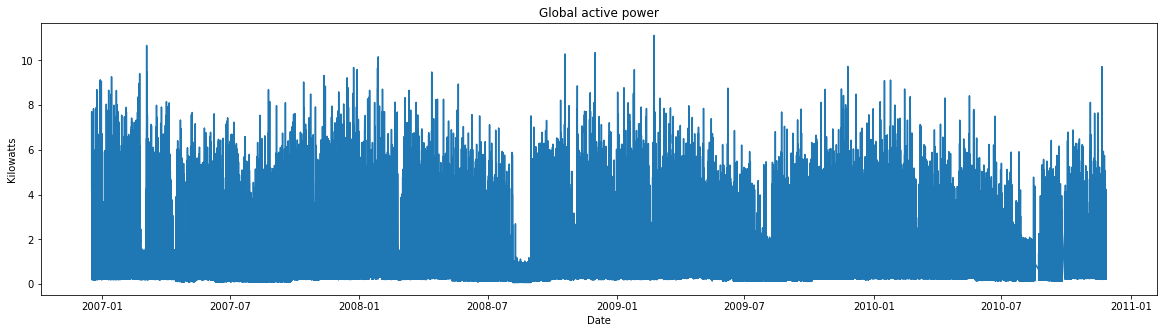

In [42]:
plt.title('Global active power')
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

Esse é um grafico de linha representando toda a base.

Como os dados sao coletados de minuto a minuto, esse gráfico parece ser de barra. Podemos ver as linhas se dermos um "zoom" nele.

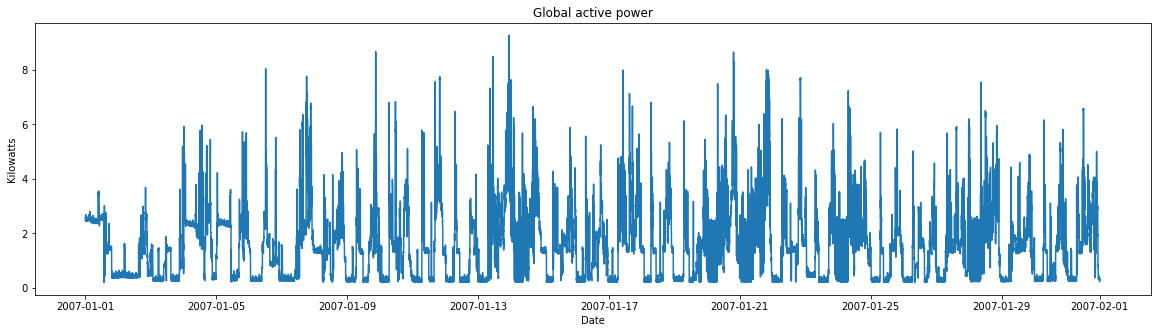

In [43]:
first_month_df = df.loc['2007-01-01':'2007-01-31']
plt.title('Global active power')
plt.plot(first_month_df.index, first_month_df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

Aqui podemos ver as linhas

# Dados a serem analisados

Temos dados de Dezembro de 2006 (16/12/2006) até Novembro de 2010 (26/11/2010). 

Seguindo o exemplo de [1], os dados de 16/12/2006 até 31/12/2009 para treinamento e 01/01/2010 até 26/11/2010 para teste. Apenas para análise, sera usado os dados a partir de 2007

In [62]:
df = df.loc['2007-01-01':'2009-12-31']

In [45]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.59189e+06,1.59189e+06,1.59189e+06,1.59189e+06,1.59189e+06,1.59189e+06,1.59189e+06
mean,1.10041,0.122073,240.646,4.67067,1.16054,1.35507,6.23273
std,1.09023,0.112011,3.31799,4.58449,6.29346,6.01422,8.34693
min,0.076,0,223.2,0.2,0,0,0
25%,0.3,0.046,238.73,1.4,0,0,0
50%,0.576,0.1,240.84,2.6,0,0,1
75%,1.534,0.192,242.78,6.4,0,1,17
max,11.122,1.39,254.15,48.4,82,78,31


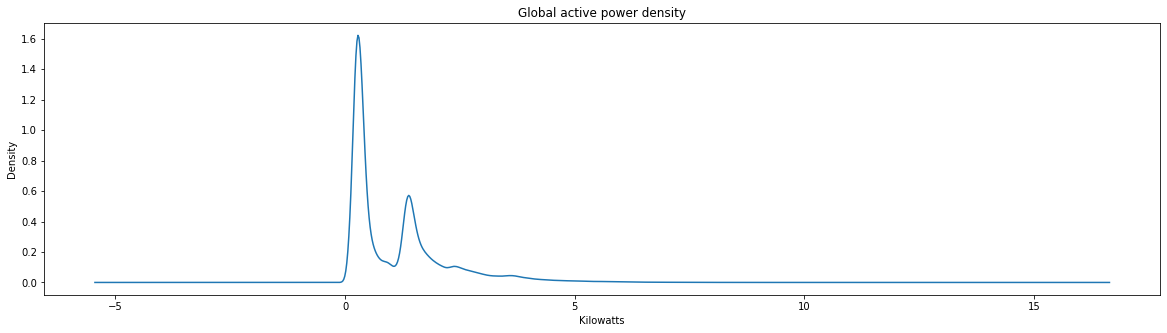

In [46]:
plt.title('Global active power density')
plt.ylabel('Value')
plt.xlabel('Kilowatts')
df['Global_active_power'].plot.kde()
plt.show()

Nesse gráfico podemos ver que os dados se encontram perto de 1. 

O gráfico de linha visto acima pode enganar o leitor já que os picos sao excessões.

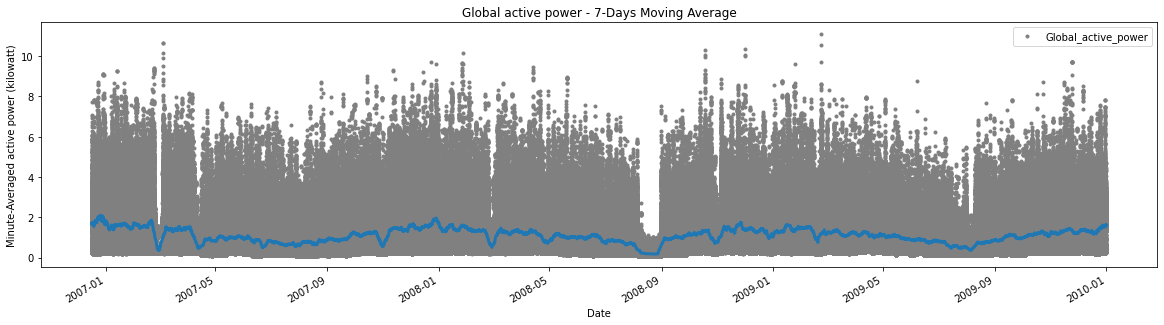

In [47]:
window = 24*60*7
df_gap = df[['Global_active_power']]

moving_average = df_gap.rolling(
    window=window,       # 7-day window
    center=True,
    min_periods=window//2,
).mean()

ax = df_gap.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Global active power - 7-Days Moving Average", legend=False, ylabel='Minute-Averaged active power (kilowatt)',
);

Esse é um grafico de média móvel de 7 dias. 

Aqui também percebemos que os dados se encontram mais em baixo. Além disso existem alguns outliers como o mes de março de 2007 e setembro de 2008. O gasto energético se mantem mais ou menos igual em todo o período

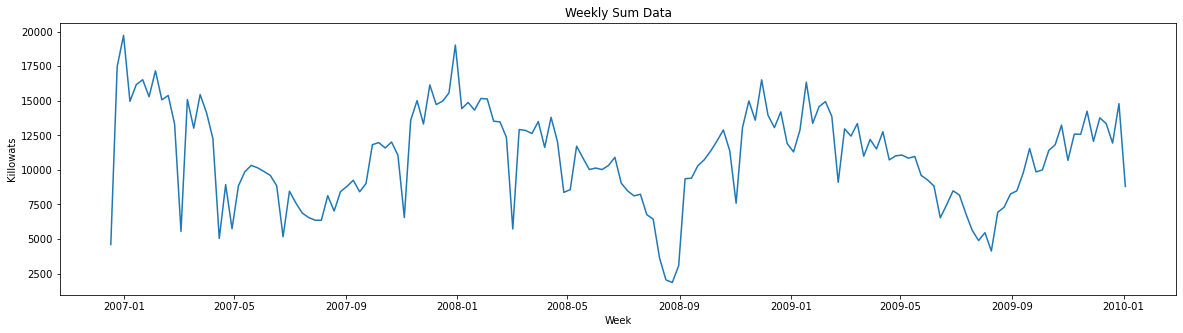

In [48]:
weekly_df = df.resample('W').sum()
weekly_df = weekly_df[['Global_active_power']]

plt.plot(weekly_df.index, weekly_df['Global_active_power'])
plt.xlabel('Week')
plt.ylabel('Killowats')
plt.title('Weekly Sum Data')
plt.show()

Esse é um gráfico com um downsampling semanal utilizando soma.

Já podemos pensar em algumas hipoteses sazionais que serão discutidas nas seções abaixo.

# Decomposição

A decomposição de séries temporais é uma técnica analítica usada para separar uma série temporal em seus componentes principais, incluindo tendência, sazonalidade e flutuações aleatórias.

Assumindo que a série é aditiva como [1], e com frequencia de 2 a 12.

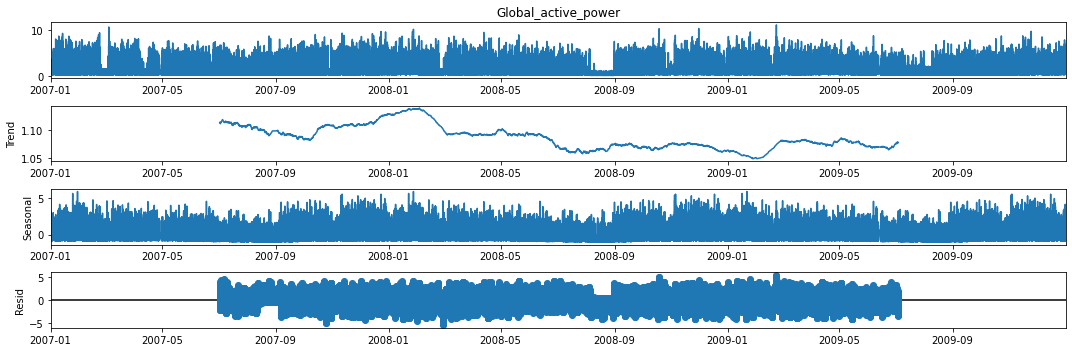

In [68]:
decomposition = seasonal_decompose(df['Global_active_power'], 
                                   model='additive',
                                   period=60*24*30*12)
fig = decomposition.plot();
fig.set_size_inches((15, 5))
fig.tight_layout()
plt.show()

Aqui percebemos que a tendência é linear (???), não existe sazonalidade e existe bastante (???) aleátoriedade.

# Sazonalidade

Vamos analisar se existem relações de tempo nesses dados.

## Hipóteses

- Temos um padrão de horarios no gasto enérgetico? A madrugada se gasta menos do que a manhã ou a noite?
- Temos um padrão nos dias de semana? Os finais de semana se gasta mais energia do que os dias de semana?
- Temos um padrão nos meses? Meses do final do ano se gasta mais energia?
- Temos um padrão das estaçoes do ano? Estaçōes frias se gasta mais energia?

## Horas

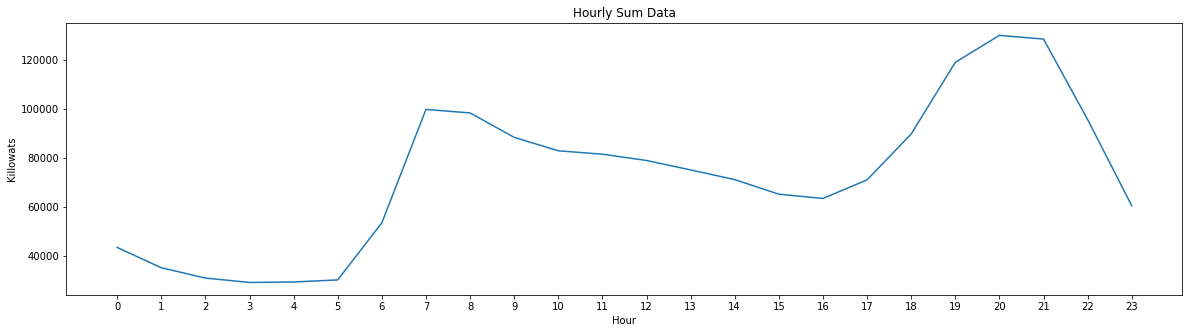

In [50]:
hourly_df = df.groupby(df.index.hour)['Global_active_power'].sum()

time = []
for x in range(0,24):
    time.append(x)
    
plt.plot(hourly_df.index, hourly_df)
plt.xticks(time)
plt.xlabel('Hour')
plt.ylabel('Killowats')
plt.title('Hourly Sum Data')
plt.show()

Como é de se esperar, a madrugada tem um gasto energetico menor, a manha tem um pico, seguido de outro pico a noite.

## Semana

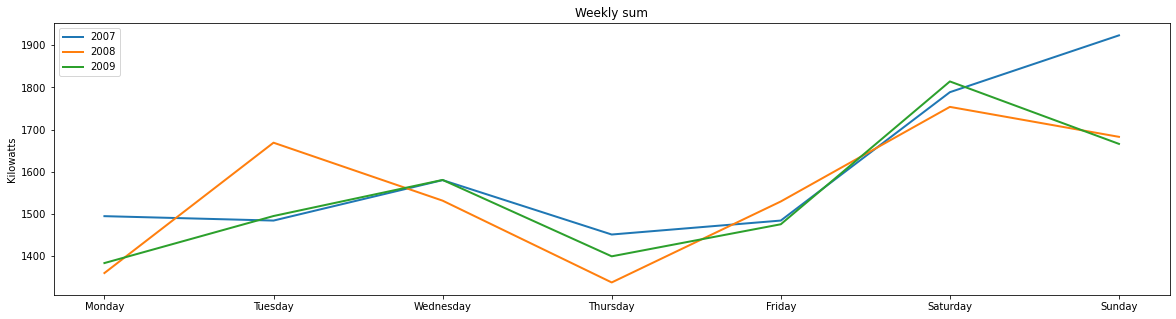

In [69]:
year_df = df.groupby(df.index.year)

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for name, group in year_df:
    weekday_index = pd.Index(weekday_names)
    
    weekday_groups = group.groupby(group.index.weekday).agg({'Global_active_power': ['sum']})
    weekday_groups.columns = weekday_groups.columns.droplevel(1)
    weekday_groups.index = weekday_index[weekday_groups.index]
    weekday_groups['Global_active_power'] = weekday_groups['Global_active_power'] / 52
    plt.ylabel('Kilowatts')
    plt.plot(weekday_groups, linewidth=2)

plt.legend(['2007', '2008', '2009'])
plt.title('Weekly sum')
plt.show()

Podemos ver que existe uma sazionalidade nos dias da semana sendo que no fim de semana se gasta mais energia.

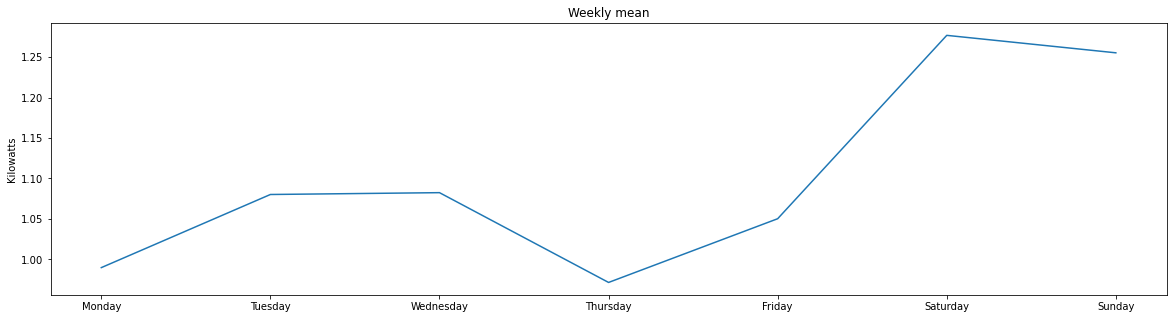

In [52]:
weekday_groups = df.groupby(df.index.weekday)

result = weekday_groups.mean()

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_index = pd.Index(weekday_names)

result.index = weekday_index[result.index]

plt.title('Weekly mean')
plt.ylabel('Kilowatts')
plt.plot(result.index, result['Global_active_power'])
plt.show()

## Mês

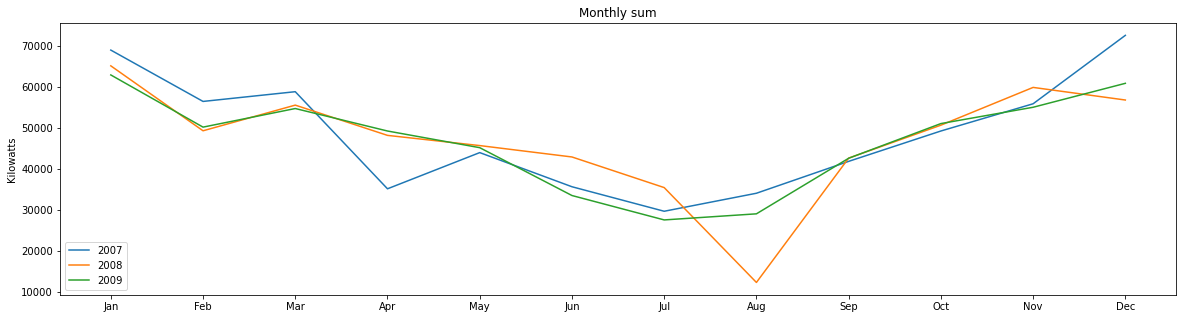

In [63]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

year_df = df.groupby(df.index.year)

for name, group in year_df:
    monthly_sum = group.groupby(pd.Grouper(freq='M'))['Global_active_power'].sum()
    month_index = pd.Index(labels)
    monthly_sum.index = month_index
    plt.plot(monthly_sum)
    
plt.ylabel('Kilowatts')
plt.title('Monthly sum')
plt.legend(['2007','2008','2009'])
plt.show()

Os meses do inicio do ano tem um gasto maior de energia enquanto os meses do meio do ano um gasto menor. É muito provável que o clima e as estaçōes do ano influenciam nesse métrica.

## Estação

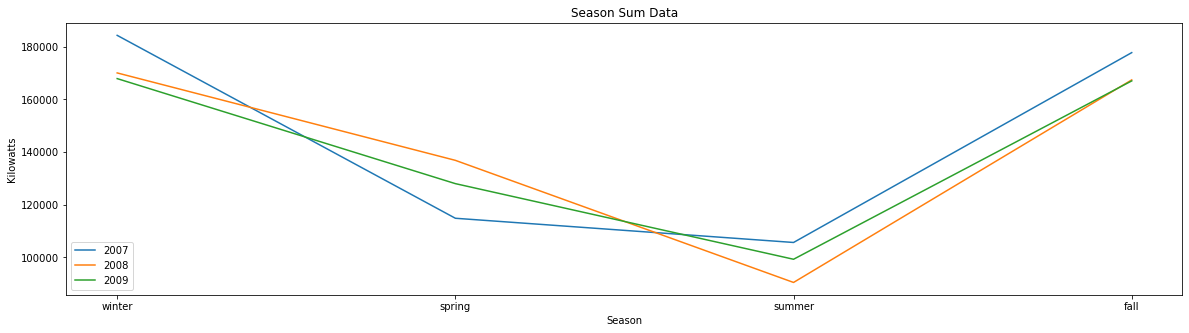

In [70]:
season_df = df[['Global_active_power', 'Global_reactive_power']]
season_df = season_df.resample('QS').sum()
season_df['season'] = pd.cut(season_df.index.month, [0,3,6,9,12], labels=['winter','spring','summer','fall'], right=False)

season_df = season_df.groupby(season_df.index.year)

for name, group in season_df:
    plt.plot(group['season'], group['Global_active_power'])
    plt.xlabel('Season')
    plt.ylabel('Kilowatts')
    plt.title('Season Sum Data')
plt.legend(['2007','2008','2009'])
plt.show()

Como esperado, o gasto energético no verão é menor do que no inverno.

# Correlação

Existe uma correlação entre esses dados?

In [ ]:
df.corr()

Da pra ver por essa matriz que a coluna Global_intesity (A) está muito correlacionada ao Global_active_power (kW).

In [ ]:
plt.ylabel('Ampere')
df['Global_intensity'].plot()
plt.show()

Essa relação não é dificil de entender já que a quantidade de corrente (ampere) na casa está diretamente ligada ao gasto energético (kilowatt).

Para criação do modelo eu nao utilizarei esse campo sendo a análise feito em cima de uma serie temporal univariavel.

# Auto-correlaçao

# Outliers

Existe uma semana que os dados estão bem abaixos da média. Vamos buscar essa semana.

In [ ]:
weekly_df = weekly_df.loc['2008-08-03':'2008-09-01']
plt.plot(weekly_df.index, weekly_df['Global_active_power'])
plt.xlabel('Week')
plt.ylabel('Killowats')
plt.title('Week Outlier')
plt.show()

Nesse grafico podemos ver que a semana 2008-08-17 ate a semana 2008-08-25 temos um outlier. 

## Hipótese
- Talvez a familia viajou de ferias?
       Já que só temos os dados, não podemos concluir nada, apenas supor.

# Refêrencias

[1] Bezzar, Nour El-Houda, Laimeche, Lakhdar, Meraoumia, Abdallah and Houam, Lotfi. "Data analysis-based time series forecast for managing household electricity consumption" Demonstratio Mathematica, vol. 55, no. 1, 2022, pp. 900-921. https://doi.org/10.1515/dema-2022-0176